# Pràctica 2

In [1]:
#importing libraries
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_csv('train.csv', header=0, delimiter=',')
test_df =  pd.read_csv('test.csv', header=0, delimiter=',')

train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Característiques de les dades:
Les característiques de les dades de test i de train son iguals, execeptuant per la columna Survived ja que es la variable objectiu.

Tipus:
Categorical:
- Pclass (ordinal)
- Name (nominal)
- Sex (nominal)

Numerical:
- Age (continuous)
- Fare (continuous)
- SibSp (discrete)
- Parch (discrete)

Mixed:
- Ticket (numeric and alphanumeric)
- Cabin (alphanumeric)

In [3]:
print("Dades Train")
print(train_df.info())

print("\nDades Test")
print(test_df.info())

Dades Train
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None

Dades Test
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-

Train Data:

- Age: 177/891 missed values (19.8% missed).
- Cabin: 687/891 missed values (77.1% missed).
- Embarked: 2/891 missed values.


Test Data:

- Age: 86/418 missed values (20.5% missed).
- Cabin: 327/418 missed values (78.2% missed).
- Fare: 1/418 missed values.

In [17]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


D'aqui podrem observar que:

- La taxa de supervivencia es del 38.3%
- Més del 75% dels passargers estan per sobre dels 38 anys
- Hi ha molta gent gran
- Molts passatgers viatjen sols
- Tenim outliers a la caracteristica Fare

## Ànalisi descriptiu

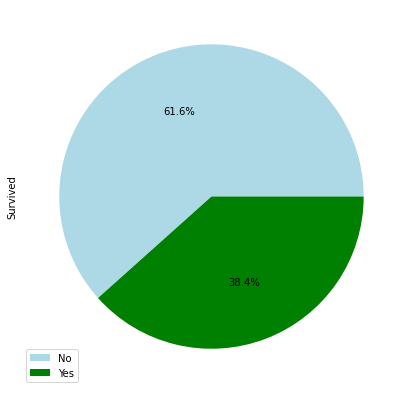

In [18]:
train_df.Survived.value_counts().plot.pie(colors = ['lightblue','Green'],
                                          legend='True',labeldistance=None,
                                         labels=['No','Yes'],
                                         figsize=(7,7),autopct='%1.1f%%')

Mirem supervivents primer per sexe, on tenim q dones i homes. Podem veure que la taxa de dones supervivents és de 74,2% i de homes de 18,8%.

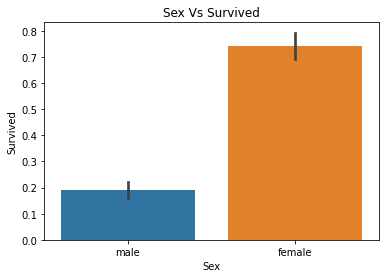

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [19]:
sns.barplot(data = train_df , x = 'Sex' , y = "Survived").set_title(f"{'Sex'} Vs Survived")
plt.show()
train_df[['Sex', "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)

També mirem la supervivència segons la classe on es trobaven, i veiem que la gent que viatjava en primera classe un 69% d'aquesta va sobreviure, si viatjaven a segona classe van sobrevirue un 47% i de tercera classe un 24%

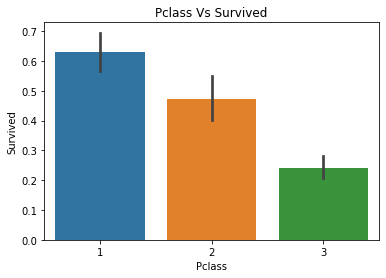

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [20]:
sns.barplot(data = train_df , x = 'Pclass' , y = "Survived").set_title(f"{'Pclass'} Vs Survived")
plt.show()
train_df[['Pclass', "Survived"]].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False).style.background_gradient(low=0.75,high=1)

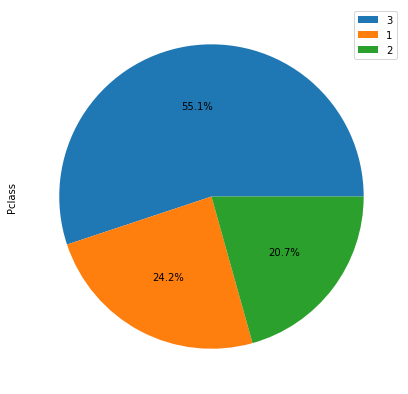

In [21]:
train_df.Pclass.value_counts().plot.pie(legend='True',labeldistance=None,
                                         figsize=(7,7),autopct='%1.1f%%')

Mirem els supervivents per edat i sexe

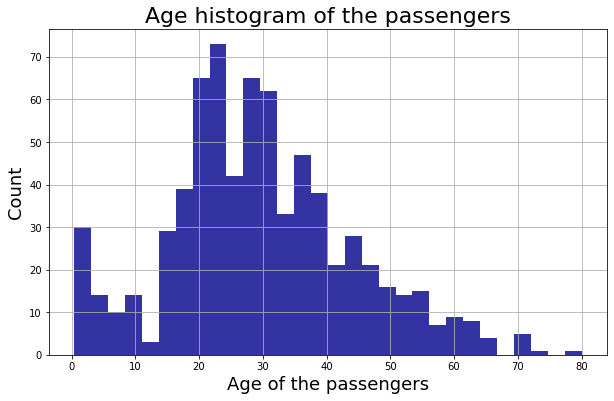

In [22]:
plt.xlabel("Age of the passengers",fontsize=18)
plt.ylabel("Count",fontsize=18)
plt.title("Age histogram of the passengers",fontsize=22)
train_df['Age'].hist(bins=30,color='darkblue',alpha=0.8,figsize=(10,6))

In [23]:
plt.figure(figsize = (6,4))
sns.histplot(data = train_df , x = 'Sex' , hue = "Survived",binwidth=5,palette = sns.color_palette(["orange" , "yellow"]) ,multiple = "stack" ).set_title(f"{'Sex'} Vs Survived")
plt.show()

AttributeError: module 'seaborn' has no attribute 'histplot'

<Figure size 432x288 with 0 Axes>

In [ ]:
plt.figure(figsize = (6,4))
sns.histplot(data = train_df , x = 'Age' , hue = "Survived",binwidth=5,palette = sns.color_palette(["orange" , "yellow"]) ,multiple = "stack" ).set_title(f"{'Sex'} Vs Survived")
plt.show()

### Correlació de les dades

In [ ]:
sns.set(rc = {'figure.figsize':(10,6)})
sns.heatmap(train_df.corr(), annot = True, fmt='.2g')

El que ens interessa es la correlació de les dades amb la variable objectiu "Survived". Com podem veure la correlació és negativa amb les variables PClass, Age, SibSp, també amb PassangerID pero la correlació es molt pròxima a 0. Les variables Parch i Fare tenen correlació positiva tot i que la de Parch també es molt pròxima a 0.

### Fem fora les variables no necesaries

In [4]:
train_df.drop(['PassengerId','Ticket'],axis=1,inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,NaN,S


In [5]:
test_df.drop(['PassengerId','Ticket'],axis=1,inplace=True)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,NaN,Q
1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,NaN,S
2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,NaN,Q
3,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,NaN,S
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,NaN,S


### Transorfmem les variables categoriques Sex i Embarked

In [6]:
train_df['Sex'] = train_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)   

In [7]:
test_df['Sex'] = test_df['Sex'].map( {'female': 1, 'male': 0} ).astype(int)   

In [8]:
train_df.Embarked.fillna(train_df.Embarked.dropna().max(), inplace=True)
train_df['Embarked'] = train_df['Embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int)

In [9]:
test_df.Embarked.fillna(train_df.Embarked.dropna().max(), inplace=True)
test_df['Embarked'] = test_df['Embarked'].dropna().map({'S':0,'C':1,'Q':2}).astype(int)

### Tractament de nuls
Hem de realitzar un tractament de nul·ls per tenir les columnes amb totes les variables necessaries, per aixo omplirem la columna d'edat segons la classe on estan situats

In [10]:
f_class_Age=train_df.groupby('Pclass')['Age'].mean()
f_class_Age = pd.DataFrame(f_class_Age)
a=list(f_class_Age['Age'])

def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return a[0]

        elif Pclass == 2:
            return a[1]

        else:
            return a[2]

    else:
        return Age

Text(0.5, 1.0, 'Bar plot of the count of numeric features')

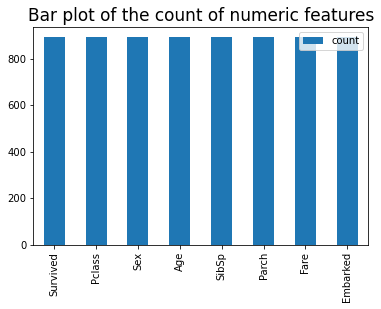

In [11]:
train_df['Age'] = train_df[['Age','Pclass']].apply(impute_age,axis=1)
d=train_df.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

In [12]:
train_df.drop('Cabin',axis=1,inplace=True)
train_df.dropna(inplace=True)
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


In [13]:
test_df.drop('Cabin',axis=1,inplace=True)
test_df.dropna(inplace=True)
test_df.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,"Kelly, Mr. James",0,34.5,0,0,7.8292,2
1,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,7.0000,0
2,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,9.6875,2
3,3,"Wirz, Mr. Albert",0,27.0,0,0,8.6625,0
4,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,12.2875,0


Fem un clean de les dades

In [14]:
data_cleaner = [train_df, test_df]

In [15]:
for dataset in data_cleaner:    
    dataset['FamilySize'] = dataset ['SibSp'] + dataset['Parch'] + 1

    dataset['IsAlone'] = 1 #initialize to yes/1 is alone
    dataset['IsAlone'].loc[dataset['FamilySize'] > 1] = 0 # now update to no/0 if family size is greater than 1

    #quick and dirty code split title from name: http://www.pythonforbeginners.com/dictionary/python-split
    dataset['Title'] = dataset['Name'].str.split(", ", expand=True)[1].str.split(".", expand=True)[0]

In [16]:
train_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0,2,0,Mr
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1,2,0,Mrs
2,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0,1,1,Miss
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0,2,0,Mrs
4,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0,1,1,Mr


In [17]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}
for dataset in data_cleaner:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

In [19]:
train_df.drop(['Name'], axis=1 , inplace = True)
test_df.drop(['Name'], axis=1 , inplace = True)    

In [20]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,IsAlone,Title
0,0,3,0,22.0,1,0,7.2500,0,2,0,1.0
1,1,1,1,38.0,1,0,71.2833,1,2,0,3.0
2,1,3,1,26.0,0,0,7.9250,0,1,1,2.0
3,1,1,1,35.0,1,0,53.1000,0,2,0,3.0
4,0,3,0,35.0,0,0,8.0500,0,1,1,1.0


Comprovem que ja no tenim valors nuls al dataset

In [21]:
print(train_df.isnull().sum())
print("-" * 20)
print(test_df.isnull().sum())

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64
--------------------
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked      0
FamilySize    0
IsAlone       0
Title         0
dtype: int64


## Apartat A

In [44]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import auc
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve
from sklearn.multiclass import OneVsRestClassifier

In [41]:
y_train = train_df["Survived"]
X_train = train_df.drop(labels = ["Survived"],axis = 1)
X_test = test_df

print(f"X_train shape is = {X_train.shape}" )
print(f"Y_train shape is = {Y_train.shape}" )
print(f"Test shape is = {Test.shape}" )

X_train shape is = (891, 10)
Y_train shape is = (891,)
Test shape is = (331, 10)


In [42]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [26]:
kfold = StratifiedKFold(n_splits=10)

In [36]:
random_state = 2
classifier = [DecisionTreeClassifier(random_state = random_state),
             SVC(random_state = random_state, probability = True),
             RandomForestClassifier(random_state = random_state),
             LogisticRegression(random_state = random_state),
             KNeighborsClassifier(),
             GradientBoostingClassifier(random_state = random_state),
             ]

In [38]:
dt_param_grid = {"min_samples_split" : range(10,500,20),
                "max_depth": range(1,20,2)}

svc_param_grid = {"kernel" : ["rbf"],
                 "gamma": [0.001, 0.01, 0.1, 1],
                 "C": [0.1, 1,10,50,100,200,300,1000]}

rf_param_grid = {"max_features": [1,3,10],
                "min_samples_split":[2,3,10],
                "min_samples_leaf":[1,3,10],
                "bootstrap":[False],
                "n_estimators":[100,300],
                "criterion":["gini"]}

logreg_param_grid = {"C":np.logspace(-4, 4, 20),
                    "penalty": ["l1","l2","none"]}

knn_param_grid = {"n_neighbors": np.linspace(2,20,12, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan","minkowski"],
                 "leaf_size": [1,3,5,12,30]}

gbc_param_grid = {
    "learning_rate": [0.05, 0.1, 0.2],
    "min_samples_split": [2,3,10],
    "min_samples_leaf": [1,3,10]
    }

classifier_param = [dt_param_grid,
                   svc_param_grid,
                   rf_param_grid,
                   logreg_param_grid,
                   knn_param_grid,
                   gbc_param_grid]

In [39]:
cv_result = []
best_estimators = []
mean_squared_errors = []
roc_auc_scores = []
recall_scores = []
precision_scores = []
f1_scores = []

In [46]:
for i in range(len(classifier)):
    print("---------------------------------------------------------------------------")
    clf = GridSearchCV(classifier[i],
                       param_grid=classifier_param[i],
                       cv = StratifiedKFold(n_splits = 10),
                       scoring = "accuracy",
                       n_jobs = -1,verbose = 2)
    
    clf.fit(X_train,y_train)
    
    cv_result.append(clf.best_score_)
    
    mean_squared_errors.append(mean_squared_error(y_test,clf.predict(X_test)))
    
    roc_auc_scores.append(roc_auc_score(y_test, clf.predict_proba(X_test), multi_class='ovr'))
    
    recall_scores.append(recall_score(y_test, clf.predict(X_test), average='weighted'))
    
    precision_scores.append(precision_score(y_test, clf.predict(X_test), average='weighted'))
    
    f1_scores.append(f1_score(y_test, clf.predict(X_test), average='weighted'))
    
    best_estimators.append(clf.best_estimator_)
    
    print("Model: {}".format(classifier[i]))
    print("Accuracy: %{}".format(round(cv_result[i]*100,2)))
    print("MSE: {}".format(mean_squared_errors[i]))
    print("ROC AUC: {}".format(roc_auc_scores[i]))
    print("Recall: {}".format(recall_scores[i]))
    print("Precision: {}".format(precision_scores[i]))
    print("F1-Score: {}".format(f1_scores[i]))
    print("Best Estimator: {}".format(clf.best_estimator_))
    
print("---------------------------------------------------------------------------")

---------------------------------------------------------------------------
Fitting 10 folds for each of 250 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 832 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    5.5s finished


TypeError: Expected sequence or array-like, got <class 'sklearn.model_selection._search.GridSearchCV'>